SVC (Support Vector Classifier)
===

### Función de riesgo

La estimación de los parámetros del modelo y la correspondiente selección de los vectores de soporte se realiza mediante la minimización de la función de riesgo regularizado de la forma:


$$
R(C, \epsilon) = C \sum_i \text{loss}(d_i, y_i) + \sum_d w_d^2
$$

La función de pérdida utilizada depende del tipo de implementación.

El término

$$
K(x_i, x_j) = \phi(x_i)^T \phi(x_j)
$$

donde $\phi(\cdot)$ es una función kernel, y el término anterior corresponde al Kernel Trick.

### Estimación de parámetros

Sea un conjunto de patrones de entrenamiento $\mathbf{x}_i \in \mathbb{R}^p$, $i=1, \dots, n$, y $y_i$ la variable dependiente con $y \in \{-1, +1 \}$, el objetivo es encontrar $w \in \mathbb{R}^p$ y $b \in \mathbb{R}$, tal que la ecuación anterior sea correcta para la mayor cantidad de patrones.

Para la clasificación, esto equivale a resolver el problema **primal**:

$$
\min_{w,b, \zeta} \;\;\;
\frac{1}{2} w^T w \; + \; C \sum_{i=1}^n \zeta_i
$$

sujeto a:



$$
\begin{split}
y_i \left( w^T \phi(x_i)+ b \right) \ge \; & 1 - \zeta_i \\
\\
\zeta_i \ge & \; 0 \\
\\
i= & 1, ..., n \\
\end{split}
$$

Una explicación intuitiva es la siguiente:

* Para llegar al óptimo se debe minimizar $0.5 w^Tw$, es decir, se desean llevar los coeficientes a cero.

*  $w^T \phi(x_i)+ b$ es la frontera de decisión entre las clases

* Si un patrón es correctamente clasificado, entonces $\zeta$ = 0. 

* Si un patrón es mal clasificado, $\zeta$ > 0 haciendo crecer el segundo término de la función objetivo.


![optimizacion_svm.png](assets/optimizacion_svm.png)

* El parámetro $C$ controla la fuerza de la penalización, y como resultado, actua como el inverso de un parámetro de regularización.

### Problema dual

El problema **dual** del **primal** es:

$$
\min_\alpha \frac{1}{2} \alpha^T  Q \alpha - e^T \alpha
$$

sujeto a:

$$
y^T\alpha = 0
$$

$$
0 \le \alpha_i \le C, \qquad i=1,\dots n
$$

donde:

* $e$ es un vector de unos.

* $Q$ es una matriz semidefinida positiva de $n \times n$.
    
* $Q_{ij} = y_i y_j K(x_i, x_j)$
    
* $K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$

* $\alpha_i$ son los coeficientes duales

### Frontera de decisión

Una vez el problema de optimización ha sido resuelto, la función de decisión se computa para una muestra $x$ como:

$$
\sum_{i  \text{ in } SV} y_i \alpha_i K(x_i, x) + b
$$

In [1]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

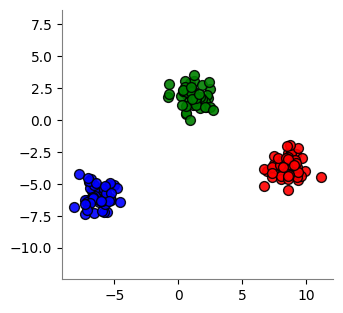

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3.5, 3.5))
plt.scatter(X[:50, 0], X[:50, 1], color="red", edgecolors="black", alpha=0.9, s=50)
plt.scatter(
    X[50:100, 0], X[50:100, 1], color="blue", edgecolors="black", alpha=0.9, s=50
)
plt.scatter(X[100:, 0], X[100:, 1], color="green", edgecolors="black", alpha=0.9, s=50)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axis("equal")
plt.show()

In [3]:
from sklearn.svm import SVC

svc = SVC(
    # --------------------------------------------------------------------------
    # Regularization parameter. The strength of the regularization is inversely
    # proportional to C. Must be strictly positive. The penalty is a squared l2
    # penalty.
    C=1,
    # --------------------------------------------------------------------------
    # Specifies the kernel type to be used in the algorithm. If none is given,
    # ‘rbf’ will be used.
    kernel="linear",
    # --------------------------------------------------------------------------
    # Degree of the polynomial kernel function (‘poly’). Must be non-negative.
    # Ignored by all other kernels.
    degree=3,
    # --------------------------------------------------------------------------
    # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    # * if gamma='scale' (default) is passed then it uses
    #   1 / (n_features * X.var()) as value of gamma,
    # * if ‘auto’, uses 1 / n_features
    # * if float, must be non-negative.
    gamma="scale",
    # --------------------------------------------------------------------------
    # Independent term in kernel function. It is only significant in ‘poly’ and
    # ‘sigmoid’.
    coef0=0.0,
    # --------------------------------------------------------------------------
    # Whether to enable probability estimates. This must be enabled prior to
    # calling fit, will slow down that method as it internally uses 5-fold
    # cross-validation, and predict_proba may be inconsistent with predict.
    probability=False,
    # --------------------------------------------------------------------------
    # Tolerance for stopping criterion.
    tol=1e-3,
    # --------------------------------------------------------------------------
    # Set the parameter C of class i to class_weight[i]*C for SVC. If not
    # given, all classes are supposed to have weight one. The “balanced” mode
    # uses the values of y to automatically adjust weights inversely
    # proportional to class frequencies in the input data as
    # n_samples / (n_classes * np.bincount(y)).
    class_weight=None,
    # --------------------------------------------------------------------------
    # Hard limit on iterations within solver, or -1 for no limit.
    max_iter=-1,
    # --------------------------------------------------------------------------
    # Whether to return a one-vs-rest (‘ovr’) decision function of shape
    # (n_samples, n_classes) as all other classifiers, or the original
    # one-vs-one (‘ovo’) decision function of libsvm which has shape
    # (n_samples, n_classes * (n_classes - 1) / 2). However, note that
    # internally, one-vs-one (‘ovo’) is always used as a multi-class strategy
    # to train models; an ovr matrix is only constructed from the ovo matrix.
    # The parameter is ignored for binary classification.
    decision_function_shape="ovr",
    # --------------------------------------------------------------------------
    # Controls the pseudo random number generation for shuffling the data for
    # probability estimates. Ignored when probability is False. Pass an int
    # for reproducible output across multiple function calls.
    random_state=None,
)

svc.fit(X, d)
svc.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

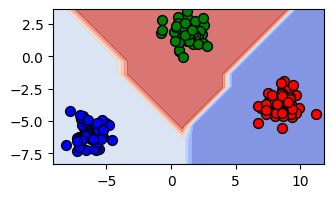

In [4]:
import numpy as np

plt.figure(figsize=(3.5, 3.5))

xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 1),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 1),
)

zz = svc.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.7)

plt.scatter(X[:50, 0], X[:50, 1], color="red", edgecolors="black", alpha=1.0, s=50)
plt.scatter(
    X[50:100, 0], X[50:100, 1], color="blue", edgecolors="black", alpha=1.0, s=50
)
plt.scatter(X[100:, 0], X[100:, 1], color="green", edgecolors="black", alpha=1.0, s=50)

plt.gca().set_aspect("equal", adjustable="box")
plt.gca().set_xlim(xx.min(), xx.max())
plt.gca().set_ylim(yy.min(), yy.max())


plt.show()